In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
# example = '/content/drive/MyDrive/Project/angry/1001_DFA_ANG_XX.wav'

In [ ]:
librosa_audio_data,librosa_sample_rate=librosa.load(example)

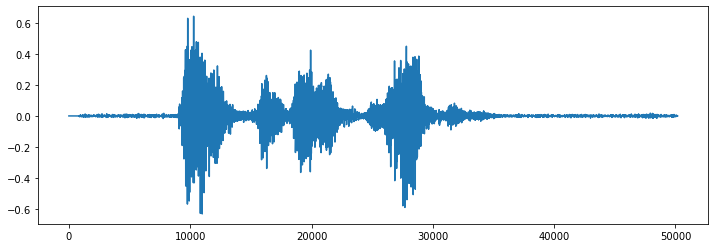

In [ ]:
### Lets plot the librosa audio data

# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 99)


In [ ]:
print(mfccs)

[[-6.19331848e+02 -5.45379822e+02 -4.91771698e+02 ... -4.71738647e+02
  -4.74749298e+02 -4.86131256e+02]
 [ 2.29503703e+00  8.52582092e+01  1.11721176e+02 ...  1.14159439e+02
   1.14507690e+02  1.11944382e+02]
 [ 2.23161983e+00  4.34561729e+01  3.40633583e+01 ...  2.58748131e+01
   2.73657455e+01  2.75854397e+01]
 ...
 [-1.97091296e-01  3.19000793e+00 -1.25379896e+00 ... -2.81867361e+00
  -1.95894706e+00 -2.73958874e+00]
 [-1.40519455e-01  2.72370458e+00 -4.01426792e-01 ... -7.08497334e+00
  -2.50569940e+00  1.28425026e+00]
 [-9.03814435e-02 -3.28368568e+00 -1.15397377e+01 ...  6.33509159e-01
   3.51038694e+00  8.31569576e+00]]


In [ ]:
mfccs_scaled_features = np.mean(mfccs.T,axis=0)

In [ ]:
mfccs_scaled_features

array([-3.42144287e+02,  1.21517204e+02, -1.03682699e+01,  3.99993477e+01,
       -2.36535788e+00,  1.38430328e+01, -1.85952835e+01, -3.38423848e+00,
       -1.05654917e+01, -2.71684217e+00, -1.10328074e+01, -2.49697614e+00,
       -2.71015334e+00, -1.42434254e+01,  8.46077442e+00, -1.30639992e+01,
       -6.74579716e+00, -4.04977369e+00, -2.04866004e+00, -8.50895500e+00,
       -6.34143877e+00, -4.78790951e+00, -8.31649208e+00, -2.06488132e+00,
       -5.16352510e+00,  1.95205593e+00, -5.10751057e+00, -9.75007892e-01,
       -2.28807950e+00, -1.91131473e+00, -1.32535422e+00, -2.31865788e+00,
       -3.03690750e-02, -3.74859405e+00, -3.39742208e+00, -6.28585720e+00,
       -3.10126495e+00, -4.62553215e+00, -2.16012168e+00, -3.22456121e+00],
      dtype=float32)

In [ ]:
mfccs_scaled_features.shape

(40,)

In [ ]:
df = {"features":[],"label":""}

In [ ]:
df1 = pd.DataFrame(df)
df1

,features,label


For angry folder

In [ ]:
df["features"].append([1,2,3])
df

{'features': [array([-3.42144287e+02,  1.21517204e+02, -1.03682699e+01,  3.99993477e+01,
         -2.36535788e+00,  1.38430328e+01, -1.85952835e+01, -3.38423848e+00,
         -1.05654917e+01, -2.71684217e+00, -1.10328074e+01, -2.49697614e+00,
         -2.71015334e+00, -1.42434254e+01,  8.46077442e+00, -1.30639992e+01,
         -6.74579716e+00, -4.04977369e+00, -2.04866004e+00, -8.50895500e+00,
         -6.34143877e+00, -4.78790951e+00, -8.31649208e+00, -2.06488132e+00,
         -5.16352510e+00,  1.95205593e+00, -5.10751057e+00, -9.75007892e-01,
         -2.28807950e+00, -1.91131473e+00, -1.32535422e+00, -2.31865788e+00,
         -3.03690750e-02, -3.74859405e+00, -3.39742208e+00, -6.28585720e+00,
         -3.10126495e+00, -4.62553215e+00, -2.16012168e+00, -3.22456121e+00],
        dtype=float32), [1, 2, 3]]}

In [ ]:
emotions = ["angry","disgusting","neutral","fear","sad","happy"]
df = {"features":[],"label":[]}
for i in tqdm(range(len(emotions))):
  x = '/content/drive/MyDrive/Project/'+emotions[i]
  df["features"].append(1)
  df["label"].append(emotions[i])
df1 = pd.DataFrame(df)

100%|██████████| 6/6 [00:00<00:00, 33779.63it/s]


In [ ]:
df1

,features,label
0,1,angry
1,1,disgusting
2,1,neutral
3,1,fear
4,1,sad
5,1,happy


In [ ]:
emotions = ["angry","disgusting","neutral","fear","sad","happy"]
df = {"features":[],"label":[]}

for i in tqdm(range(len(emotions))):

  directory_in_str = '/content/drive/MyDrive/Project/'+emotions[i]
  directory = os.fsencode(directory_in_str)
  for file in os.listdir(directory):
      filename = os.fsdecode(file)
      if filename.endswith(".wav"): 
          input_file = os.path.join(directory_in_str, filename)
          librosa_audio_data,librosa_sample_rate=librosa.load(input_file)
          mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
          mfccs_scaled_features = np.mean(mfccs.T,axis=0)
          df["features"].append(mfccs_scaled_features)
          df["label"].append(emotions[i])
          continue
      else:
          continue
df1 = pd.DataFrame(df)

100%|██████████| 6/6 [16:11<00:00, 161.98s/it]


In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-383.28080,129.025680,6.725122,45.048153,-10.602237,24.299510,-12.379131,7.111644,-11.453820,4.536908,...,5.035336,9.181309,2.200274,4.408360,-0.058679,1.563217,-0.028449,3.247313,0.676603,angry
1,-365.54830,107.410940,10.010994,52.017910,-5.349019,9.420311,-2.205777,-0.012821,-11.281303,0.398828,...,1.304965,2.249910,0.600862,2.390933,0.453876,1.343777,-1.530176,-0.064558,-1.417050,angry
2,-235.31712,79.115780,-33.186375,32.690372,-29.027842,11.978436,-2.339653,-2.630504,-10.111052,-0.238073,...,-3.202735,5.847508,0.969342,0.680738,0.197743,1.789665,-1.896150,2.240611,3.775195,angry
3,-398.73752,123.408134,26.174740,36.959320,1.810971,14.170843,-4.459259,5.540706,-2.800648,1.765887,...,3.806696,8.082392,3.758154,2.035726,0.014838,1.278469,0.981957,1.436810,1.182725,angry
4,-317.20804,85.247696,-4.314046,54.234795,-2.510233,9.677505,-7.052187,5.132479,-7.112117,3.160773,...,-1.088403,2.870391,0.265788,1.991917,1.114080,2.839550,-0.596067,2.493289,1.523902,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6517,-390.16592,120.680820,22.140957,41.486850,-9.438580,15.620555,-4.625036,6.646065,-11.271548,1.345829,...,-0.893061,4.738586,-0.133088,3.440098,-0.122920,-0.230559,0.161332,1.653889,0.903675,happy
6518,-404.43160,133.506200,10.420002,47.298470,-11.010125,22.920393,-5.713853,7.303456,-14.268019,6.911110,...,4.013002,8.920037,2.246373,4.190974,1.261720,3.596652,0.936682,0.985774,-0.925280,happy
6519,-331.71133,112.940980,-16.334888,34.235714,-0.770657,14.111943,-18.456493,5.625763,-6.887795,-7.040695,...,0.453894,6.639338,2.543531,2.632956,-0.460336,0.765737,-2.125839,3.507952,-0.801620,happy
6520,-311.06137,107.860590,-14.922688,25.980679,-2.979716,20.669493,-28.228035,0.265919,-5.659656,-6.300776,...,-2.066725,1.564192,0.393225,0.877027,-1.295221,1.523033,-2.019155,2.176860,-0.539329,happy


In [ ]:
df1.to_csv('mfccs.csv')

NameError: ignored

In [ ]:
df1.shape

(6522, 2)

In [ ]:
df1.iloc[:,1:]

,label
0,angry
1,angry
2,angry
3,angry
4,angry
...,...
6517,happy
6518,happy
6519,happy
6520,happy


In [ ]:
df2 = pd.DataFrame(df1["features"].to_list())
df2

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-383.280792,129.025681,6.725121,45.048153,-10.602237,24.299509,-12.379131,7.111644,-11.453820,4.536908,...,3.716096,5.035336,9.181309,2.200274,4.408360,-0.058679,1.563217,-0.028449,3.247313,0.676603
1,-365.548309,107.410942,10.010994,52.017910,-5.349019,9.420311,-2.205777,-0.012821,-11.281303,0.398828,...,5.797583,1.304965,2.249910,0.600862,2.390933,0.453876,1.343777,-1.530176,-0.064558,-1.417050
2,-235.317123,79.115784,-33.186375,32.690372,-29.027842,11.978436,-2.339653,-2.630504,-10.111053,-0.238073,...,-1.248673,-3.202735,5.847508,0.969342,0.680738,0.197743,1.789665,-1.896150,2.240611,3.775195
3,-398.737518,123.408134,26.174740,36.959320,1.810971,14.170843,-4.459259,5.540706,-2.800648,1.765887,...,2.130546,3.806696,8.082392,3.758154,2.035726,0.014838,1.278469,0.981957,1.436810,1.182725
4,-317.208038,85.247696,-4.314046,54.234795,-2.510233,9.677505,-7.052187,5.132479,-7.112117,3.160773,...,2.566876,-1.088403,2.870391,0.265788,1.991917,1.114080,2.839550,-0.596067,2.493289,1.523902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6517,-390.165924,120.680817,22.140957,41.486851,-9.438580,15.620555,-4.625036,6.646065,-11.271548,1.345829,...,-0.664780,-0.893062,4.738586,-0.133088,3.440098,-0.122920,-0.230559,0.161332,1.653888,0.903675
6518,-404.431610,133.506195,10.420002,47.298470,-11.010125,22.920393,-5.713853,7.303456,-14.268019,6.911110,...,2.966964,4.013002,8.920037,2.246373,4.190974,1.261720,3.596652,0.936682,0.985774,-0.925280
6519,-331.711334,112.940979,-16.334888,34.235714,-0.770657,14.111943,-18.456493,5.625763,-6.887794,-7.040695,...,1.908246,0.453894,6.639338,2.543531,2.632956,-0.460336,0.765737,-2.125839,3.507952,-0.801620
6520,-311.061371,107.860588,-14.922688,25.980679,-2.979717,20.669493,-28.228035,0.265919,-5.659656,-6.300776,...,1.644269,-2.066725,1.564192,0.393225,0.877027,-1.295221,1.523033,-2.019155,2.176860,-0.539329


In [ ]:
df2[0][1]

'[-3.8328079e+02  1.2902568e+02  6.7251215e+00  4.5048153e+01\n -1.0602237e+01  2.4299509e+01 -1.2379131e+01  7.1116443e+00\n -1.1453820e+01  4.5369077e+00  1.9262323e+00 -8.0618286e+00\n  1.4307082e-01 -8.4568129e+00  3.9773829e+00 -1.2124672e+01\n  1.2608397e+00 -6.5787754e+00 -1.4637150e+00 -6.1971097e+00\n -5.0514259e+00  2.7017024e-01 -6.3544011e+00  3.8172505e+00\n -6.4482027e-01  4.4505987e+00 -3.0622034e+00  8.2900643e-02\n -4.0570593e+00 -1.6202734e+00  3.7160957e+00  5.0353355e+00\n  9.1813087e+00  2.2002735e+00  4.4083605e+00 -5.8679063e-02\n  1.5632166e+00 -2.8449137e-02  3.2473125e+00  6.7660266e-01]'

In [ ]:
df3 = pd.concat([df2,df1.iloc[:,1:]], axis=1)

In [ ]:
df3

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-383.280792,129.025681,6.725121,45.048153,-10.602237,24.299509,-12.379131,7.111644,-11.453820,4.536908,...,5.035336,9.181309,2.200274,4.408360,-0.058679,1.563217,-0.028449,3.247313,0.676603,angry
1,-365.548309,107.410942,10.010994,52.017910,-5.349019,9.420311,-2.205777,-0.012821,-11.281303,0.398828,...,1.304965,2.249910,0.600862,2.390933,0.453876,1.343777,-1.530176,-0.064558,-1.417050,angry
2,-235.317123,79.115784,-33.186375,32.690372,-29.027842,11.978436,-2.339653,-2.630504,-10.111053,-0.238073,...,-3.202735,5.847508,0.969342,0.680738,0.197743,1.789665,-1.896150,2.240611,3.775195,angry
3,-398.737518,123.408134,26.174740,36.959320,1.810971,14.170843,-4.459259,5.540706,-2.800648,1.765887,...,3.806696,8.082392,3.758154,2.035726,0.014838,1.278469,0.981957,1.436810,1.182725,angry
4,-317.208038,85.247696,-4.314046,54.234795,-2.510233,9.677505,-7.052187,5.132479,-7.112117,3.160773,...,-1.088403,2.870391,0.265788,1.991917,1.114080,2.839550,-0.596067,2.493289,1.523902,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6517,-390.165924,120.680817,22.140957,41.486851,-9.438580,15.620555,-4.625036,6.646065,-11.271548,1.345829,...,-0.893062,4.738586,-0.133088,3.440098,-0.122920,-0.230559,0.161332,1.653888,0.903675,happy
6518,-404.431610,133.506195,10.420002,47.298470,-11.010125,22.920393,-5.713853,7.303456,-14.268019,6.911110,...,4.013002,8.920037,2.246373,4.190974,1.261720,3.596652,0.936682,0.985774,-0.925280,happy
6519,-331.711334,112.940979,-16.334888,34.235714,-0.770657,14.111943,-18.456493,5.625763,-6.887794,-7.040695,...,0.453894,6.639338,2.543531,2.632956,-0.460336,0.765737,-2.125839,3.507952,-0.801620,happy
6520,-311.061371,107.860588,-14.922688,25.980679,-2.979717,20.669493,-28.228035,0.265919,-5.659656,-6.300776,...,-2.066725,1.564192,0.393225,0.877027,-1.295221,1.523033,-2.019155,2.176860,-0.539329,happy


In [ ]:
df3.to_csv('mfccs.csv')

# Neural network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/mfccs.csv',index_col=0)

In [ ]:
y = df1.iloc[:,-1:]
y

,label
0,angry
1,angry
2,angry
3,angry
4,angry
...,...
6517,happy
6518,happy
6519,happy
6520,happy


In [ ]:
X = df1.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-383.28080,129.025680,6.725122,45.048153,-10.602237,24.299510,-12.379131,7.111644,-11.453820,4.536908,...,3.716096,5.035336,9.181309,2.200274,4.408360,-0.058679,1.563217,-0.028449,3.247313,0.676603
1,-365.54830,107.410940,10.010994,52.017910,-5.349019,9.420311,-2.205777,-0.012821,-11.281303,0.398828,...,5.797583,1.304965,2.249910,0.600862,2.390933,0.453876,1.343777,-1.530176,-0.064558,-1.417050
2,-235.31712,79.115780,-33.186375,32.690372,-29.027842,11.978436,-2.339653,-2.630504,-10.111052,-0.238073,...,-1.248673,-3.202735,5.847508,0.969342,0.680738,0.197743,1.789665,-1.896150,2.240611,3.775195
3,-398.73752,123.408134,26.174740,36.959320,1.810971,14.170843,-4.459259,5.540706,-2.800648,1.765887,...,2.130546,3.806696,8.082392,3.758154,2.035726,0.014838,1.278469,0.981957,1.436810,1.182725
4,-317.20804,85.247696,-4.314046,54.234795,-2.510233,9.677505,-7.052187,5.132479,-7.112117,3.160773,...,2.566876,-1.088403,2.870391,0.265788,1.991917,1.114080,2.839550,-0.596067,2.493289,1.523902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6517,-390.16592,120.680820,22.140957,41.486850,-9.438580,15.620555,-4.625036,6.646065,-11.271548,1.345829,...,-0.664780,-0.893061,4.738586,-0.133088,3.440098,-0.122920,-0.230559,0.161332,1.653889,0.903675
6518,-404.43160,133.506200,10.420002,47.298470,-11.010125,22.920393,-5.713853,7.303456,-14.268019,6.911110,...,2.966964,4.013002,8.920037,2.246373,4.190974,1.261720,3.596652,0.936682,0.985774,-0.925280
6519,-331.71133,112.940980,-16.334888,34.235714,-0.770657,14.111943,-18.456493,5.625763,-6.887795,-7.040695,...,1.908246,0.453894,6.639338,2.543531,2.632956,-0.460336,0.765737,-2.125839,3.507952,-0.801620
6520,-311.06137,107.860590,-14.922688,25.980679,-2.979716,20.669493,-28.228035,0.265919,-5.659656,-6.300776,...,1.644269,-2.066725,1.564192,0.393225,0.877027,-1.295221,1.523033,-2.019155,2.176860,-0.539329


In [ ]:
#emotions = ["angry","disgusting","neutral","fear","sad","happy"]

y = y.replace(to_replace="angry", value=0)
y = y.replace(to_replace="disgusting", value=1)
y = y.replace(to_replace="neutral", value=2)
y = y.replace(to_replace="fear", value=3)
y = y.replace(to_replace="sad", value=4)
y = y.replace(to_replace="happy", value=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([5217, 40]) torch.Size([5217])
torch.Size([1305, 40]) torch.Size([1305])


In [ ]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 30)
    self.fc2 = nn.Linear(30, 15)
    self.fc3 = nn.Linear(15, 6)
  def forward(self, x):
    z = torch.tanh(self.fc1(x))
    z = torch.tanh(self.fc2(z))
    z = self.fc3(z)
    return z
net = Net(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train = X_train.type(torch.float64)
X_train = X_train.to(device)

y_train = y_train.type(torch.int64)
y_train = y_train.to(device)

X_test = X_test.type(torch.float64)
X_test = X_test.to(device)

y_test = y_test.type(torch.int64)
y_test = y_test.to(device)

net = net.to(device)
# net = net.to(torch.float64)
criterion = criterion.to(device)
# criterion = criterion.to(torch.float64)

In [ ]:
def calculate_accuracy(y_true, y_pred):

  print(y_true)
  print(y_pred)

  print((y_true == y_pred).sum())
  score = (y_true == y_pred).sum().float() / len(y_true)
  print(score)
  return (y_true == y_pred).sum().float() / len(y_true)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(1000):
    y_pred = net(X_train.float())

    y_pred = torch.squeeze(y_pred)

    out, inds_pred = torch.max(y_pred,dim=1)

    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, inds_pred)
      y_test_pred = net(X_test.float())
      y_test_pred = torch.squeeze(y_test_pred)
      out, inds_test_pred = torch.max(y_test_pred,dim=1)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, inds_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

tensor([5, 1, 1,  ..., 2, 3, 5], device='cuda:0')
tensor([2, 2, 2,  ..., 2, 2, 2], device='cuda:0')
tensor(918, device='cuda:0')
tensor(0.1760, device='cuda:0')
tensor([3, 3, 3,  ..., 4, 4, 4], device='cuda:0')
tensor([2, 2, 2,  ..., 2, 2, 2], device='cuda:0')
tensor(218, device='cuda:0')
tensor(0.1670, device='cuda:0')
epoch 0
Train set - loss: 1.791, accuracy: 0.176
Test  set - loss: 1.797, accuracy: 0.167

tensor([5, 1, 1,  ..., 2, 3, 5], device='cuda:0')
tensor([2, 4, 4,  ..., 4, 4, 0], device='cuda:0')
tensor(1849, device='cuda:0')
tensor(0.3544, device='cuda:0')
tensor([3, 3, 3,  ..., 4, 4, 4], device='cuda:0')
tensor([4, 4, 4,  ..., 4, 4, 4], device='cuda:0')
tensor(460, device='cuda:0')
tensor(0.3525, device='cuda:0')
epoch 100
Train set - loss: 1.545, accuracy: 0.354
Test  set - loss: 1.532, accuracy: 0.352

tensor([5, 1, 1,  ..., 2, 3, 5], device='cuda:0')
tensor([1, 4, 4,  ..., 1, 3, 0], device='cuda:0')
tensor(2074, device='cuda:0')
tensor(0.3975, device='cuda:0')
tensor([3